In [2]:
!pip install -U matplotlib
!pip install -U sklearn
!pip install -U pandas
!pip install -U seaborn
!pip install -U pprint
!pip install -U numpy
!pip install -U pandas
!pip install -U plotly
!pip install -U chart_studio
!pip install -U mpld3
!pip install -U pdpbox

     |████████████████████████████████| 13.1MB 3.3MB/s eta 0:00:01    |██████▏                         | 2.5MB 3.3MB/s eta 0:00:04
     |████████████████████████████████| 20.3MB 21.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 18.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 24.9MB/s eta 0:00:01


In [3]:
%matplotlib inline


Visualizing cross-validation behavior in scikit-learn
=====================================================

Choosing the right cross-validation object is a crucial part of fitting a
model properly. There are many ways to split data into training and test
sets in order to avoid model overfitting, to standardize the number of
groups in test sets, etc.

This example visualizes the behavior of several common scikit-learn objects
for comparison.

**Reference**:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html<br>
Copyright (c) 2007–2019 The scikit-learn developers. All rights reserved.

In [6]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

Visualize our data
------------------

First, we must understand the structure of our data. It has 100 randomly
generated input datapoints, 3 classes split unevenly across datapoints,
and 10 "groups" split evenly across datapoints.

As we'll see, some cross-validation objects do specific things with
labeled data, others behave differently with grouped data, and others
do not use this information.

To begin, we'll visualize our data.



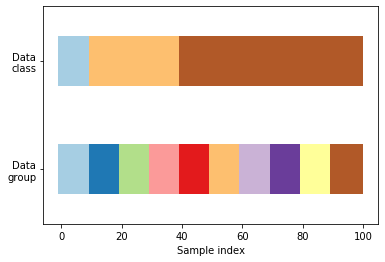

In [7]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

Define a function to visualize cross-validation behavior
--------------------------------------------------------

We'll define a function that lets us visualize the behavior of each
cross-validation object. We'll perform 4 splits of the data. On each
split, we'll visualize the indices chosen for the training set
(in blue) and the test set (in red).



In [8]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

Let's see how it looks for the `KFold` cross-validation object:



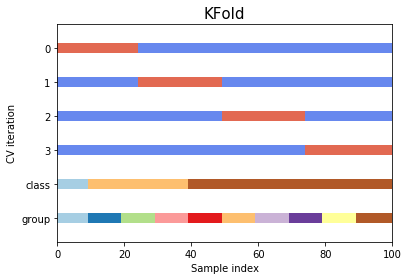

In [9]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

As you can see, by default the KFold cross-validation iterator does not
take either datapoint class or group into consideration. We can change this
by using the ``StratifiedKFold`` like so.



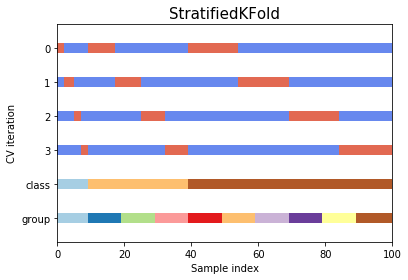

In [10]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

In this case, the cross-validation retained the same ratio of classes across
each CV split. Next we'll visualize this behavior for a number of CV
iterators.

Visualize cross-validation indices for many CV objects
------------------------------------------------------

Let's visually compare the cross validation behavior for many
scikit-learn cross-validation objects. Below we will loop through several
common cross-validation objects, visualizing the behavior of each.

Note how some use the group/class information while others do not.



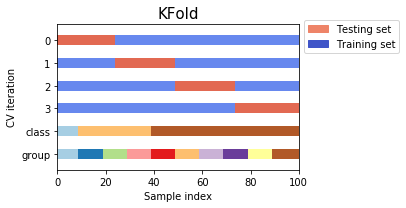

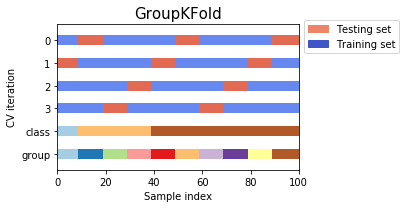

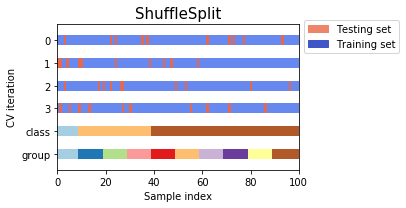

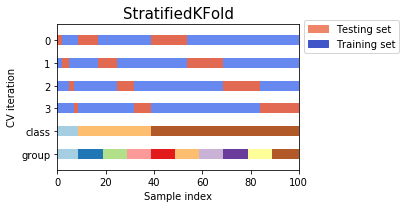

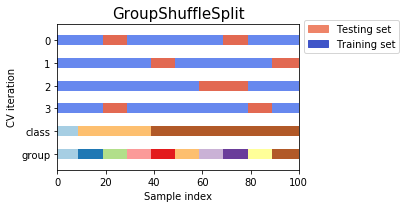

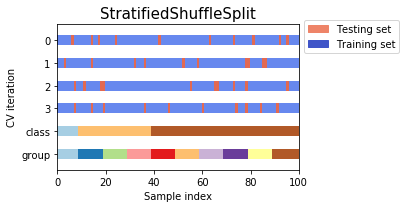

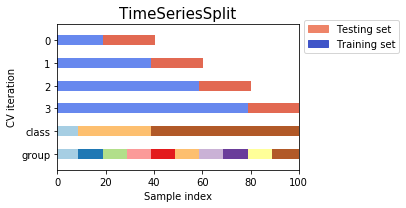

In [11]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

# Apply different cv to the Iris dataset

## First import the needed libraries

In [23]:
import pandas as pd
import numpy as np
import pickle as pk
from pprint import pprint

# for dataset spliting
from sklearn.model_selection import train_test_split

# for the cross validation
from sklearn.model_selection import cross_val_score


# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


from sklearn.exceptions import ConvergenceWarning
import warnings

## Load the dataset using pandas

In [17]:
data = pd.read_csv('./Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Pre-process the dataset using train_test_split

In [18]:
# Here, a Data preprocessing function was defined in order to faciliate the unsdertanding

def pre_processing(data):
    X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
    y = data['Species']

    xtrain,xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
    
    return  xtrain,xtest, ytrain, ytest

# 4 Data preprocessing, here the aboce function was applied
xtrain,xtest, ytrain, ytest = pre_processing(data)

## Now we will iterate the same model algorithm using different cv methods

Model name: LR 

<class 'sklearn.model_selection._split.KFold'> ; Accuracy:  0.9408793820558526
<class 'sklearn.model_selection._split.ShuffleSplit'> ; Accuracy:  1.0
<class 'sklearn.model_selection._split.StratifiedKFold'> ; Accuracy:  0.9419642857142857
<class 'sklearn.model_selection._split.StratifiedShuffleSplit'> ; Accuracy:  0.9666666666666667


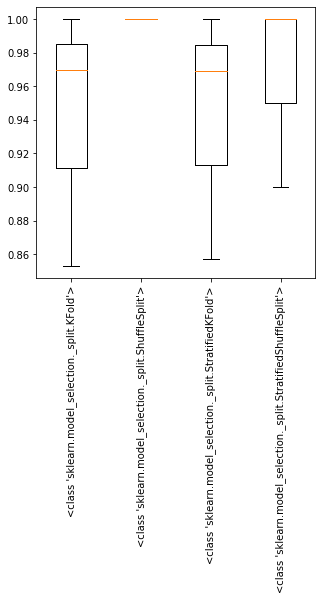

Model name: CART 

<class 'sklearn.model_selection._split.KFold'> ; Accuracy:  0.9500891265597149
<class 'sklearn.model_selection._split.ShuffleSplit'> ; Accuracy:  0.8666666666666667
<class 'sklearn.model_selection._split.StratifiedKFold'> ; Accuracy:  0.9604347041847042
<class 'sklearn.model_selection._split.StratifiedShuffleSplit'> ; Accuracy:  0.8666666666666667


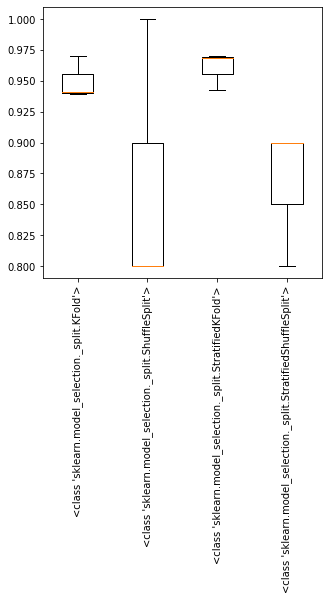

Model name: KNN 

<class 'sklearn.model_selection._split.KFold'> ; Accuracy:  0.94058229352347
<class 'sklearn.model_selection._split.ShuffleSplit'> ; Accuracy:  0.9666666666666667
<class 'sklearn.model_selection._split.StratifiedKFold'> ; Accuracy:  0.9413870851370851
<class 'sklearn.model_selection._split.StratifiedShuffleSplit'> ; Accuracy:  0.9666666666666667


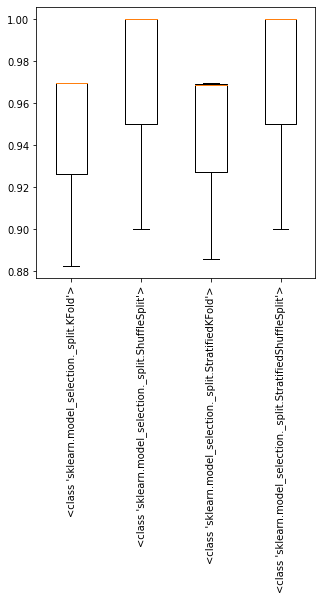

Model name: NB 

<class 'sklearn.model_selection._split.KFold'> ; Accuracy:  0.9506833036244801
<class 'sklearn.model_selection._split.ShuffleSplit'> ; Accuracy:  1.0
<class 'sklearn.model_selection._split.StratifiedKFold'> ; Accuracy:  0.9610119047619047
<class 'sklearn.model_selection._split.StratifiedShuffleSplit'> ; Accuracy:  0.9333333333333332


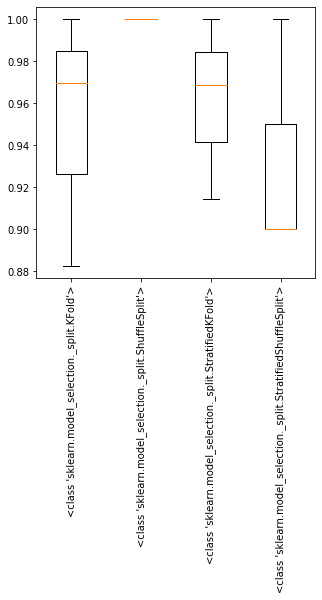

Model name: LDA 

<class 'sklearn.model_selection._split.KFold'> ; Accuracy:  0.960190136660725
<class 'sklearn.model_selection._split.ShuffleSplit'> ; Accuracy:  1.0
<class 'sklearn.model_selection._split.StratifiedKFold'> ; Accuracy:  0.9604347041847042
<class 'sklearn.model_selection._split.StratifiedShuffleSplit'> ; Accuracy:  0.9333333333333332


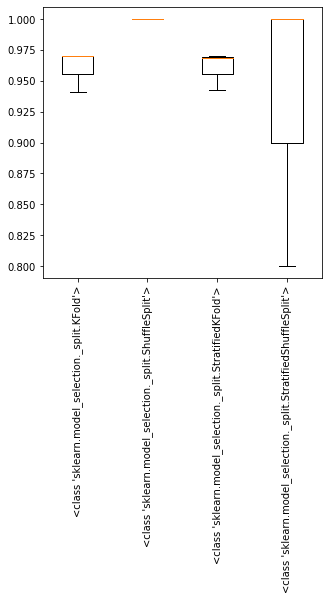

Model name: SVM 

<class 'sklearn.model_selection._split.KFold'> ; Accuracy:  0.9506833036244801
<class 'sklearn.model_selection._split.ShuffleSplit'> ; Accuracy:  0.9333333333333332
<class 'sklearn.model_selection._split.StratifiedKFold'> ; Accuracy:  0.9514880952380952
<class 'sklearn.model_selection._split.StratifiedShuffleSplit'> ; Accuracy:  0.9666666666666667


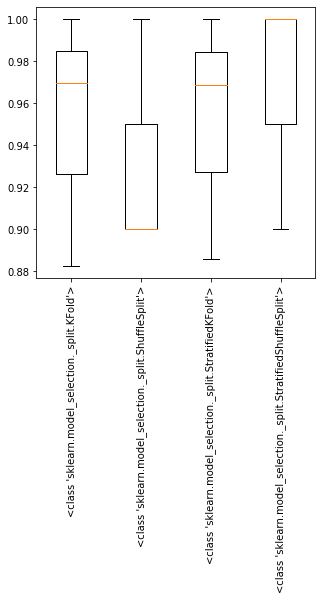

In [24]:
# Building Models for iris flower classification

#This line keeps the replroducible state of the ramdomization.
np.random.seed(1000)

#This makes a list of ml classification models
models = []

#
cv_list = [KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit]

warnings.filterwarnings("ignore", category=ConvergenceWarning,
                        module="sklearn")

def classification_Models(xtrain,xtest, ytrain, ytest ):
    

    #Here the classification algorithms are selected from the sklearn.linear_model module;
    models.append( ('LR',   LogisticRegression(solver='lbfgs',multi_class="multinomial")) )
    models.append( ('CART', DecisionTreeClassifier()) )
    models.append( ('KNN',  KNeighborsClassifier()) )
    models.append( ('NB',   GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC(gamma='auto')) ) 
    
    
    #Now we start the iteration: for every model in the list...
    
    for name,model in models:
        print("Model name:",name,"\n")
        #This saves the results of the modelling for the boxplot at the end of the block
        modeloutcomes = []
        #This saves the name of the cv method for plotting at the end of the block
        cv_names = []
    
        #... We use a different cv method
        for cv_name in cv_list:
            v_results = cross_val_score(model, xtrain, ytrain, cv = cv_name(n_splits=3), 
                                        scoring='accuracy', n_jobs = -1, verbose = 0)
            #This will print the name of the cv method and the Accuracy score obtained durin the cross-validation
            print(cv_name,'; Accuracy: ',v_results.mean())

            #This will save the results and the name of the model to print in the boxplot
            modeloutcomes.append(v_results)

            #This will save the name of the cross-validation to print in the boxplot
            cv_names.append(cv_name)

        #This will print the total results of the cross validation if you're interested to look at 
        #print(modeloutcomes)

        fig = plt.figure(figsize = (5,5))
        ax = fig.add_subplot(111)
        ax.set_xticklabels(cv_names,rotation=90)

        plt.boxplot(modeloutcomes)
        plt.xticks([1, 2, 3, 4], cv_names)
        plt.show()
        
classification_Models(xtrain,xtest, ytrain, ytest)